## pyCELP Contribution functions (recreates Schad & Dima (2020) Figure 2) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
import matplotlib as mpl
plt.ion()
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rkbgym')
import pycelp

We first load reference data generated using the IDL version of Chianti Version 9. 

* This was created using the genChiantiData.pro script. 

In [3]:
savname = './chianti_temp_contfnc_data.sav'  # ,logt,ch_int,ions,wvl,dens,rht
idls = readsav(savname)
logt = idls['logt']
ch_int = np.copy(idls['ch_int']) ## units are  INT_UNITS   STRING   'photons cm-2 sr-1 s-1'
ions = idls['ions']
wvl  = idls['wvl']
dens = idls['dens']
rht  = idls['rht']
## remove bad low point
ch_int[:,0] = 1.e-35

Now we initialize all ions for the figure. 

* We limit the number of levels to 300 only for speed purposes.  

In [4]:
fe14 = pycelp.Ion('fe_14',nlevels = 300) # -- issue with scups read for now !
fe13 = pycelp.Ion('fe_13',nlevels = 300)
fe11 = pycelp.Ion('fe_11',nlevels = 300)
si10 = pycelp.Ion('si_10')
si9 = pycelp.Ion('si_9')

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

In [5]:
temps = 10.**logt
pycelp_int = np.zeros((6,len(temps)))
edens = idls['dens']
rphot = rht-1.
thetab = np.rad2deg(np.arccos(1./np.sqrt(3.)))  ## Van Vleck

print(' ')
print(' Starting calculations -- with many levels, so it may be slower')
print(' Paper includes all...this script currently truncates at 300 levels for speed')
print(' The comparison should still be very good')
print(' ')
print(fe14,fe11,fe13,si10,si9)
print(' ')
print(' Electron density, height, and thetaB: ')
print(edens,rphot,thetab)
print(' ')

for n,t in enumerate(temps):
    print(n,' of ',len(temps)-1, ' temperatures')
    fe14.calc(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    fe11.calc(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    fe13.calc(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    si10.calc(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    si9.calc(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    pycelp_int[0,n] = fe14.calc_Iemiss(5303)
    pycelp_int[1,n] = fe11.calc_Iemiss(7892)
    pycelp_int[2,n] = fe13.calc_Iemiss(10746)
    pycelp_int[3,n] = fe13.calc_Iemiss(10798)
    pycelp_int[4,n] = si10.calc_Iemiss(14301)
    pycelp_int[5,n] = si9.calc_Iemiss(39343)


 
 Starting calculations -- with many levels, so it may be slower
 Paper includes all...this script currently truncates at 300 levels for speed
 The comparison should still be very good
 
pyCELP Ion class
    ---------------------
    Ion Name: fe_14
    Number of energy levels included: 300
    Number of SEE equations: 791
    Number of Radiative Transitions: 10585
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq pyCELP Ion class
    ---------------------
    Ion Name: fe_11
    Number of energy levels included: 300
    Number of SEE equations: 1034
    Number of Radiative Transitions: 8876
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq pyCELP Ion class
    ---------------------
    Ion Name: fe_13
    Number of energy levels included: 300
    Number of SEE equations: 985
    Number of Radiative Transitions: 10715
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/c

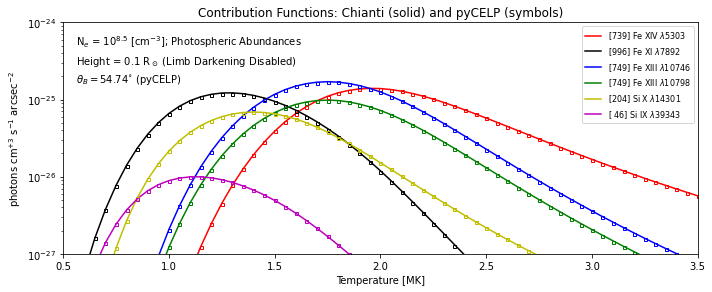

In [7]:

plt.close('all')
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (10,10./1.6/1.5))

labs = [r'[739] Fe XIV $\lambda5303$',
        r'[996] Fe XI $\lambda7892$',
        r'[749] Fe XIII $\lambda10746$',
        r'[749] Fe XIII $\lambda10798$',
        r'[204] Si X $\lambda14301$',
        r'[ 46] Si IX $\lambda39343$']
sr2arcsec = (180./np.pi)**2.*3600.**2.

for zz in range(0,len(wvl)):
    ax.plot((10.**logt)/1.e6,ch_int[zz,:]/sr2arcsec,label = labs[zz])
for n in range(6):
    ax.plot(temps/1e6,pycelp_int[n,:]/edens/(0.85*edens),'s',markersize = 3,fillstyle = 'none')

ax.set_xlim(0.5,3.5)
ax.set_yscale('log')
ax.set_ylim(1.e-27,1.e-24)
ax.set_ylabel(r'photons cm$^{+3}$ s$^{-1}$ arcsec$^{-2}$')
ax.set_xlabel('Temperature [MK]')
ax.text(0.02,0.9,r'N$_{e}$ = $10^{8.5}$ [cm$^{-3}$]; Photospheric Abundances',transform = ax.transAxes)
ax.text(0.02,0.82,r'Height = 0.1 R$_\odot$ (Limb Darkening Disabled)',transform = ax.transAxes)
ax.text(0.02,0.74,r'$\theta_{B} = 54.74^{\circ}$ (pyCELP)',transform = ax.transAxes)
ax.set_title('Contribution Functions: Chianti (solid) and pyCELP (symbols)')
ax.legend(fontsize = 8)
fig.tight_layout()
